## Projeto Vai_Academy: Previsão de demanda

In [ ]:
# Importar bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Ler a base de dados


In [ ]:
df_vendas = pd.read_csv('tbl_vendas_mensais.csv', sep=';', decimal='.')
df_vendas.head()

dt_sale  id_sku         ds_sku      ds_category  \
0  2019-01-01 00:00:00       1        AeroJet        Aero Boot   
1  2019-01-01 00:00:00       2       FlyQuest        Aero Boot   
2  2019-01-01 00:00:00       3     AirVoyager        Aero Boot   
3  2019-01-01 00:00:00       4        Classic  Classic Sneaker   
4  2019-01-01 00:00:00       5  Brand Classic  Classic Sneaker   

  ds_product_line ds_brand_segment ds_tecnology  qt_sale vl_sale_price  
0            Boot           Target     NanoMesh    37873   876388,4791  
1            Boot           Target    LiteWeave    32881   832876,3526  
2            Boot           Target     AeroKnit    17849   398926,2618  
3         Sneaker           Target    PowerKnit    69531   1104861,055  
4         Sneaker           Target    PowerKnit    21138   442648,4596

In [ ]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dt_sale           1871 non-null   object
 1   id_sku            1871 non-null   int64 
 2   ds_sku            1871 non-null   object
 3   ds_category       1871 non-null   object
 4   ds_product_line   1871 non-null   object
 5   ds_brand_segment  1871 non-null   object
 6   ds_tecnology      1871 non-null   object
 7   qt_sale           1871 non-null   int64 
 8   vl_sale_price     1847 non-null   object
dtypes: int64(2), object(7)
memory usage: 131.7+ KB


In [ ]:
# Verificando valores nulos na tabela
df_vendas.isnull().sum()

dt_sale              0
id_sku               0
ds_sku               0
ds_category          0
ds_product_line      0
ds_brand_segment     0
ds_tecnology         0
qt_sale              0
vl_sale_price       24
dtype: int64

Nota-se que a variável "vl_sale_price" possuem dados ausentes


In [ ]:
# Converter uma coluna para datetime
df_vendas['dt_sale'] = pd.to_datetime(df_vendas['dt_sale'])

# Extrair o ano em uma nova coluna 'ano'
df_vendas['dt_sale_year'] = df_vendas['dt_sale'].dt.year

# Extrair o mês em uma nova coluna 'mês'
df_vendas['dt_sale_month'] = df_vendas['dt_sale'].dt.month

# Excluir a coluna 'coluna_indesejada'
del df_vendas['dt_sale']

# Definir a ordem desejada das colunas
ordem_colunas = ['dt_sale_year', 'dt_sale_month','id_sku', \
                 'ds_sku','ds_category','ds_product_line','ds_brand_segment', \
                 'ds_tecnology','qt_sale','vl_sale_price']

# Reorganizar as colunas do DataFrame
df_vendas = df_vendas[ordem_colunas]

In [ ]:
# Substituir os valores NaN por zero na coluna de dados object
df_vendas['vl_sale_price'] = df_vendas['vl_sale_price'].fillna(0)

# Converter a virgula (,) dos valores da coluna "vl_sale_price" por ponto (.)
df_vendas['vl_sale_price'] = df_vendas['vl_sale_price'].str.replace(',','.')

# Converter a coluna para float
df_vendas['vl_sale_price'] = df_vendas['vl_sale_price'].astype('float')

In [ ]:
# Preço unitário dos produtos por mês
df_vendas['vl_price_unit'] = df_vendas['vl_sale_price']/df_vendas['qt_sale']

### Identificar os produtos com as respectivas categorias

In [ ]:
# Definição das categorias de cada um dos produtos
num_id_sku = df_vendas['id_sku'].unique()

for i in num_id_sku:
    print(f"{i}: " + df_vendas.loc[df_vendas['id_sku'] == i,'ds_category'].iloc[0])

1: Aero Boot
2: Aero Boot
3: Aero Boot
4: Classic Sneaker
5: Classic Sneaker
6: Classic Sneaker
7: Designed Shoes
8: Designed Shoes
9: Designed Shoes
10: Designed Shoes
11: Infinity Boot
12: Infinity Boot
13: Infinity Boot
14: Infinity Boot
15: Infinity Boot
16: Innovation Shoes
17: Innovation Shoes
18: Innovation Shoes
19: Innovation Shoes
20: Innovation Shoes
22: Metal Sandal
23: Metal Sandal
24: Metal Sandal
25: Metal Sandal
26: Metal Shoes
27: Metal Shoes
28: Metal Shoes
29: Metal Shoes
30: Metal Shoes
34: Price Sneakers
35: Price Sneakers
36: Price Sneakers
37: Price Sneakers
38: Universe Sandals
39: Universe Sandals
21: Innovation Shoes
31: NYCs Shoes
32: NYCs Shoes
33: NYCs Shoes


### Analisar utilizando a função groupby

In [ ]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dt_sale_year      1871 non-null   int64  
 1   dt_sale_month     1871 non-null   int64  
 2   id_sku            1871 non-null   int64  
 3   ds_sku            1871 non-null   object 
 4   ds_category       1871 non-null   object 
 5   ds_product_line   1871 non-null   object 
 6   ds_brand_segment  1871 non-null   object 
 7   ds_tecnology      1871 non-null   object 
 8   qt_sale           1871 non-null   int64  
 9   vl_sale_price     1847 non-null   float64
 10  vl_price_unit     1847 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 160.9+ KB


#### Comparar "ds_category" e "ds_tecnology"

In [ ]:
grupos1 = df_vendas.groupby(['dt_sale_year','ds_category','ds_tecnology'])

In [ ]:
data1 = grupos1['qt_sale','vl_sale_price'].sum()

<ipython-input-11-47e42a89f437>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1 = grupos1['qt_sale','vl_sale_price'].sum()


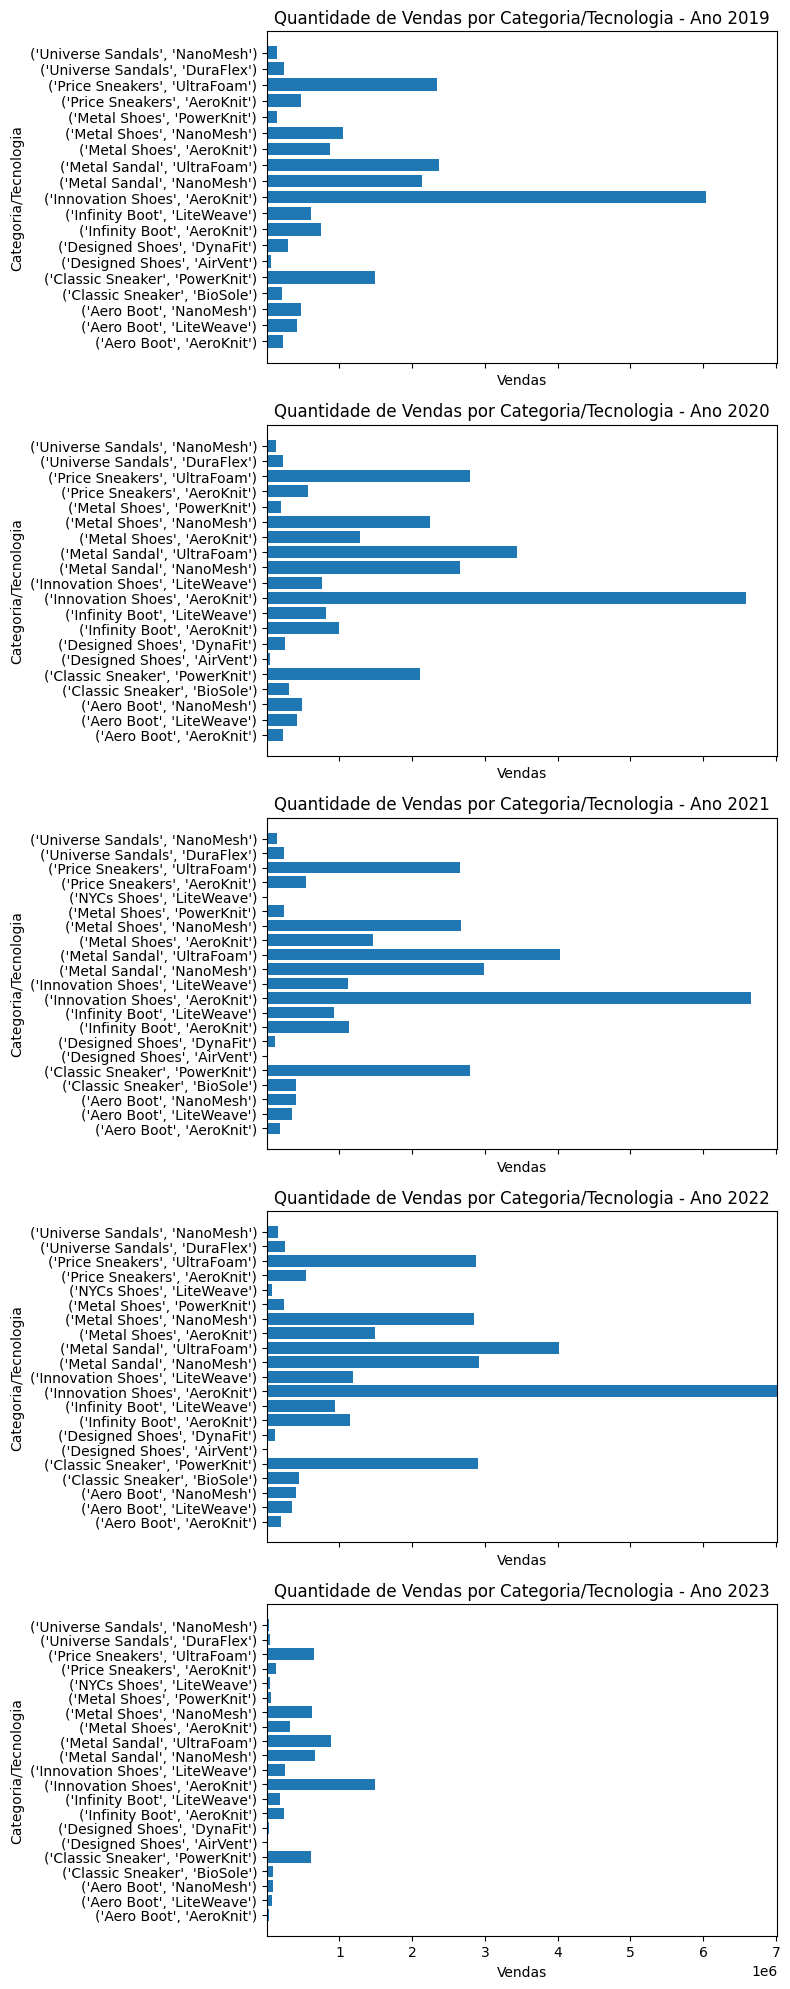

In [ ]:
anos = range(2019, 2024)

# Criar uma figura e subplots para cada ano
fig, axs = plt.subplots(len(anos), 1, figsize=(8, len(anos) * 4), sharex=True)

# Loop pelos anos
for i, ano in enumerate(anos):
    # Filtrar o DataFrame pelo ano desejado
    data_ano_desejado = data1.loc[ano]

    # Converter os índices em uma lista de strings
    categorias = list(map(str, data_ano_desejado.index))

    # Plotar o gráfico de barras na horizontal no subplot correspondente
    axs[i].barh(y=categorias, width=data_ano_desejado['qt_sale'])

    # Personalizar rótulos dos eixos e título
    axs[i].set_xlabel('Vendas')
    axs[i].set_ylabel('Categoria/Tecnologia')
    axs[i].set_title(f'Quantidade de Vendas por Categoria/Tecnologia - Ano {ano}')

    # Ajustar os limites do eixo x
    axs[i].set_xlim(data1['qt_sale'].min(), data1['qt_sale'].max())

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

#### Comparar "ds_category" e "ds_product_line"




In [ ]:
grupos2 = df_vendas.groupby(['dt_sale_year','ds_category','ds_product_line'])
data2 = grupos2['qt_sale','vl_sale_price'].sum()

<ipython-input-13-32ba751479ff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2 = grupos2['qt_sale','vl_sale_price'].sum()


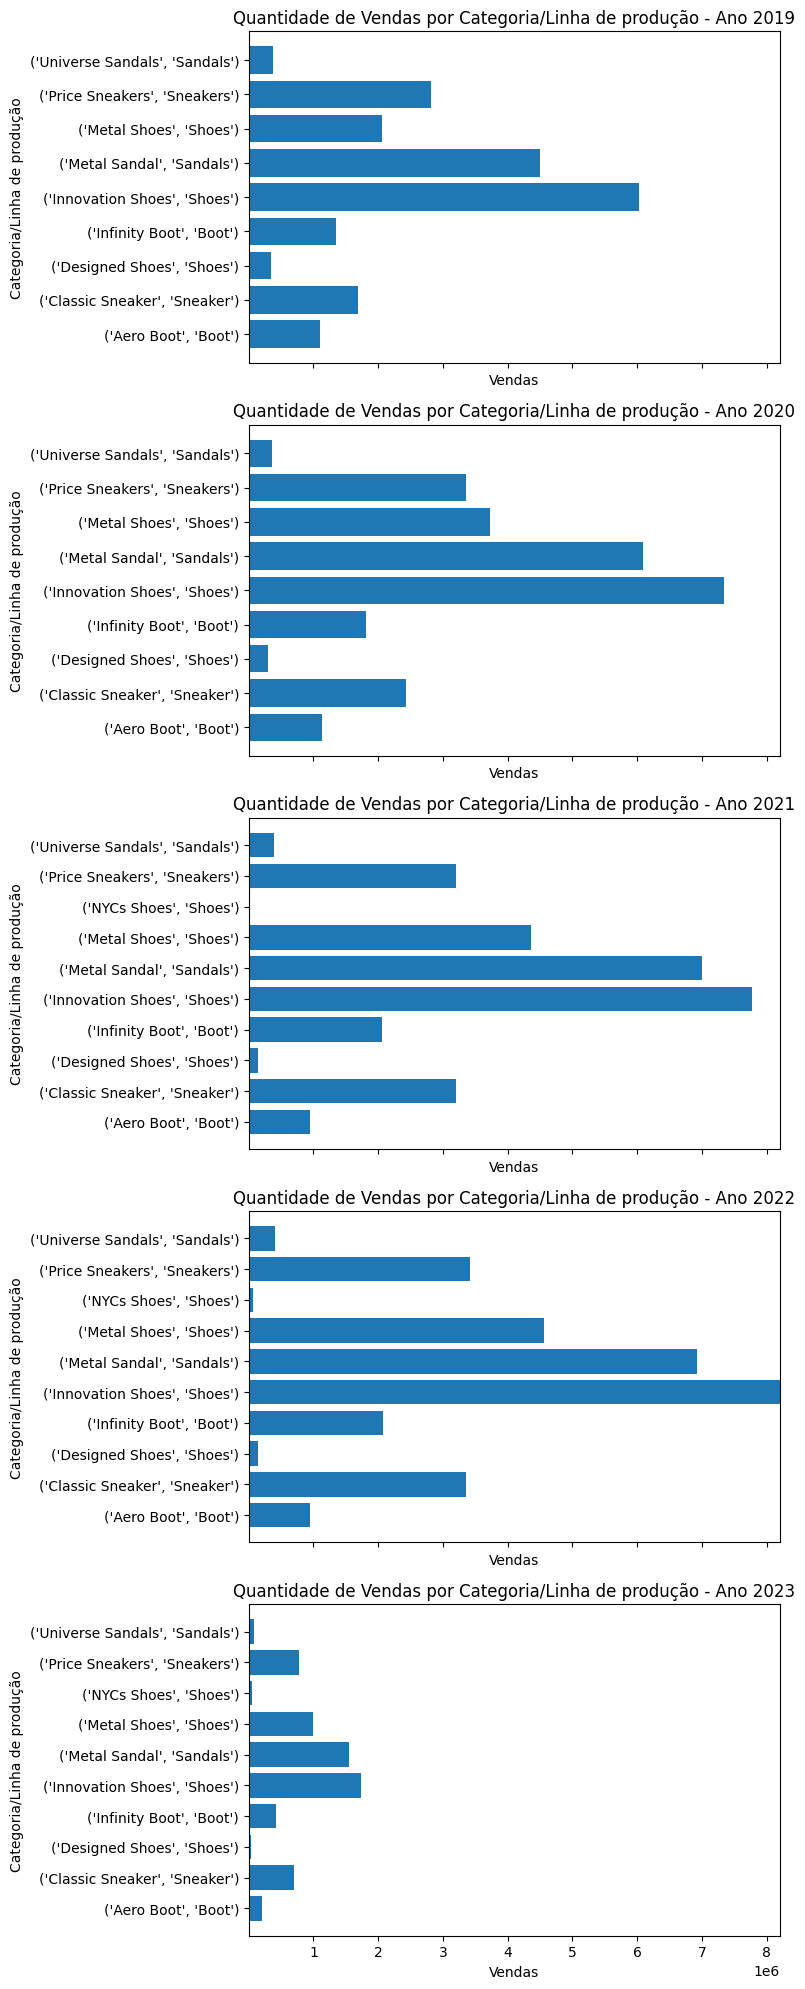

In [ ]:
anos = range(2019, 2024)

# Criar uma figura e subplots para cada ano
fig, axs = plt.subplots(len(anos), 1, figsize=(8, len(anos) * 4), sharex=True)

# Loop pelos anos
for i, ano in enumerate(anos):
    # Filtrar o DataFrame pelo ano desejado
    data_ano_desejado = data2.loc[ano]

    # Converter os índices em uma lista de strings
    categorias = list(map(str, data_ano_desejado.index))

    # Plotar o gráfico de barras na horizontal no subplot correspondente
    axs[i].barh(y=categorias, width=data_ano_desejado['qt_sale'])

    # Personalizar rótulos dos eixos e título
    axs[i].set_xlabel('Vendas')
    axs[i].set_ylabel('Categoria/Linha de produção')
    axs[i].set_title(f'Quantidade de Vendas por Categoria/Linha de produção - Ano {ano}')

    # Ajustar os limites do eixo x
    axs[i].set_xlim(data2['qt_sale'].min(), data2['qt_sale'].max())

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Análise do boxplot

In [ ]:
# Copiar o DataFrame original
df_vendas_sns = df_vendas.copy()

categorias = [valor for valor in df_vendas_sns['ds_category'].unique()]
dicionario = {valor: indice+1 for indice, valor in enumerate(categorias)}
df_vendas_sns['ds_category'] = df_vendas_sns['ds_category'].replace(dicionario)

In [ ]:
dicionario

{'Aero Boot': 1,
 'Classic Sneaker': 2,
 'Designed Shoes': 3,
 'Infinity Boot': 4,
 'Innovation Shoes': 5,
 'Metal Sandal': 6,
 'Metal Shoes': 7,
 'Price Sneakers': 8,
 'Universe Sandals': 9,
 'NYCs Shoes': 10}

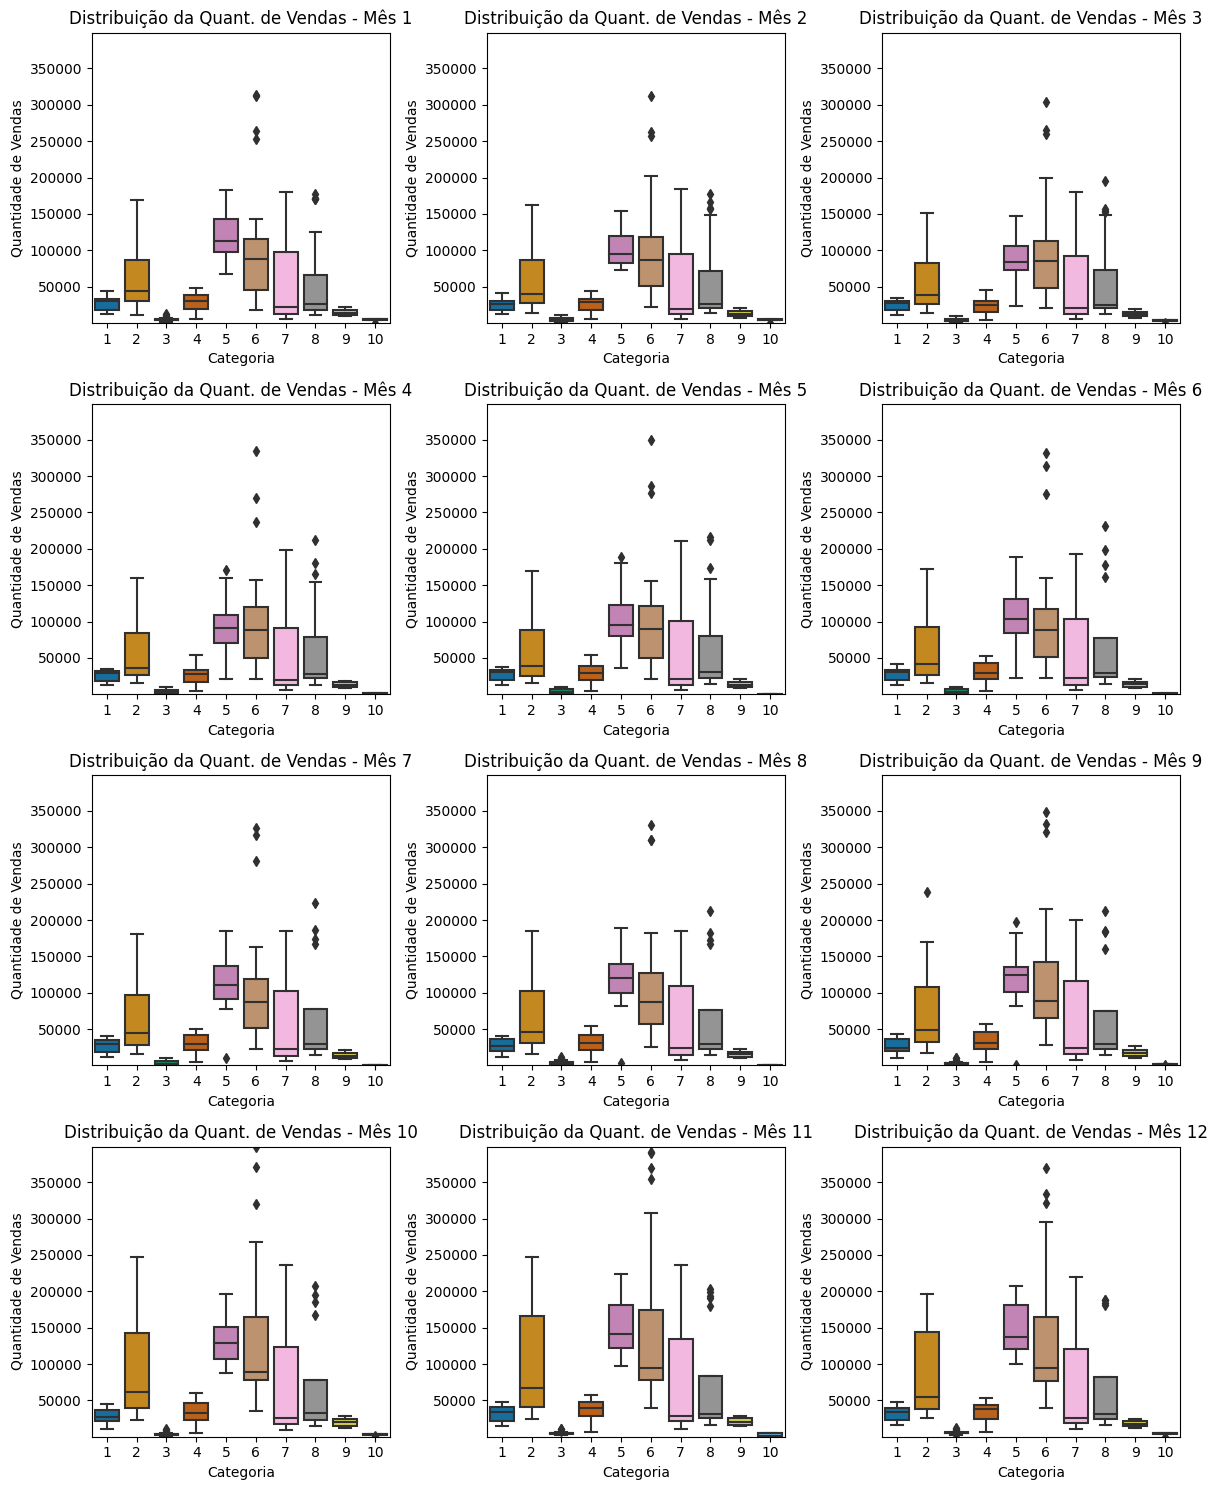

In [ ]:
# Definir a figura e os subplots
fig, axs = plt.subplots(4, 3, figsize=(12, 15))
meses = range(1, 13)  # meses de 1 a 12

# Loop pelos meses
for mes, ax in zip(meses, axs.flatten()):
    # Filtrar os dados para o mês atual
    df_mes = df_vendas_sns.loc[(df_vendas_sns['dt_sale_month'] == mes)]

    # Plotar o boxplot no subplot correspondente
    sns.boxplot(data=df_mes, x='ds_category', y='qt_sale', palette='colorblind', ax=ax)

    # Personalizar os rótulos dos eixos e o título
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Quantidade de Vendas')
    ax.set_title(f'Distribuição da Quant. de Vendas - Mês {mes}')

    # Ajustar os limites do eixo x
    ax.set_ylim(df_vendas_sns['qt_sale'].min(), df_vendas_sns['qt_sale'].max())

# Ajustar o espaçamento entre subplots
plt.tight_layout()

# Exibir a figura
plt.show()

### Análise da distribuição das vendas no tempo

Com base nos gráficos de vendas ao longo do tempo, pode-se levantar certa correlação entre os produtos:

* Produto *Aero Boot*: [1,2,3]
* Produto *Classic Sneaker*: [4,5,6]
* Produto *Designed Shoes*: [7,8,9,10]
* Produto *Infinity Boot*/*Innovation Shoes* : [11,12,13,14,15,16,17]
* **Produto Innovation Shoes**: [18] (Produto não é mais vendido)[2023]
* Produto *Innovation Shoes*: [19,20]
* Produto *Metal Sandal*: [23] (Comportamento diferente)
* Produtos *Metal Sandal*/*Metal Shoes*: [22,23,24,25,26,27,28,29,30]
* Produto *Price Sneakers*: [34,36,37]
* Produto *Price Sneakers*: [35]
* Produto *Universe Sandals*: [38,39]
* Produto *Innovation Shoes*: [21] (Produto não inicia suas vendas em 2019)
* Produto *NYCs Shoes*: [31,32,33] (Produtos vendidos em 2022)

In [ ]:
df_sale = pd.read_csv('tbl_vendas_mensais.csv', sep=';', decimal='.')

# Converter uma coluna para datetime
df_sale['dt_sale'] = pd.to_datetime(df_sale['dt_sale'])

In [ ]:
df_sale.head()

dt_sale  id_sku         ds_sku      ds_category ds_product_line  \
0 2019-01-01       1        AeroJet        Aero Boot            Boot   
1 2019-01-01       2       FlyQuest        Aero Boot            Boot   
2 2019-01-01       3     AirVoyager        Aero Boot            Boot   
3 2019-01-01       4        Classic  Classic Sneaker         Sneaker   
4 2019-01-01       5  Brand Classic  Classic Sneaker         Sneaker   

  ds_brand_segment ds_tecnology  qt_sale  vl_sale_price  vl_price_unit  
0           Target     NanoMesh    37873   8.763885e+05      23.140192  
1           Target    LiteWeave    32881   8.328764e+05      25.330019  
2           Target     AeroKnit    17849   3.989263e+05      22.350062  
3           Target    PowerKnit    69531   1.104861e+06      15.890194  
4           Target    PowerKnit    21138   4.426485e+05      20.940887

In [ ]:
# Substituir os valores NaN por zero na coluna de dados object
df_sale['vl_sale_price'] = df_sale['vl_sale_price'].fillna(0)

# Converter a virgula (,) dos valores da coluna "vl_sale_price" por ponto (.)
df_sale['vl_sale_price'] = df_sale['vl_sale_price'].str.replace(',','.')

# Converter a coluna para float
df_sale['vl_sale_price'] = df_sale['vl_sale_price'].astype('float')

# Preço unitário dos produtos por mês
df_sale['vl_price_unit'] = df_sale['vl_sale_price']/df_sale['qt_sale']

In [ ]:
num_id_sku = df_sale['id_sku'].unique()

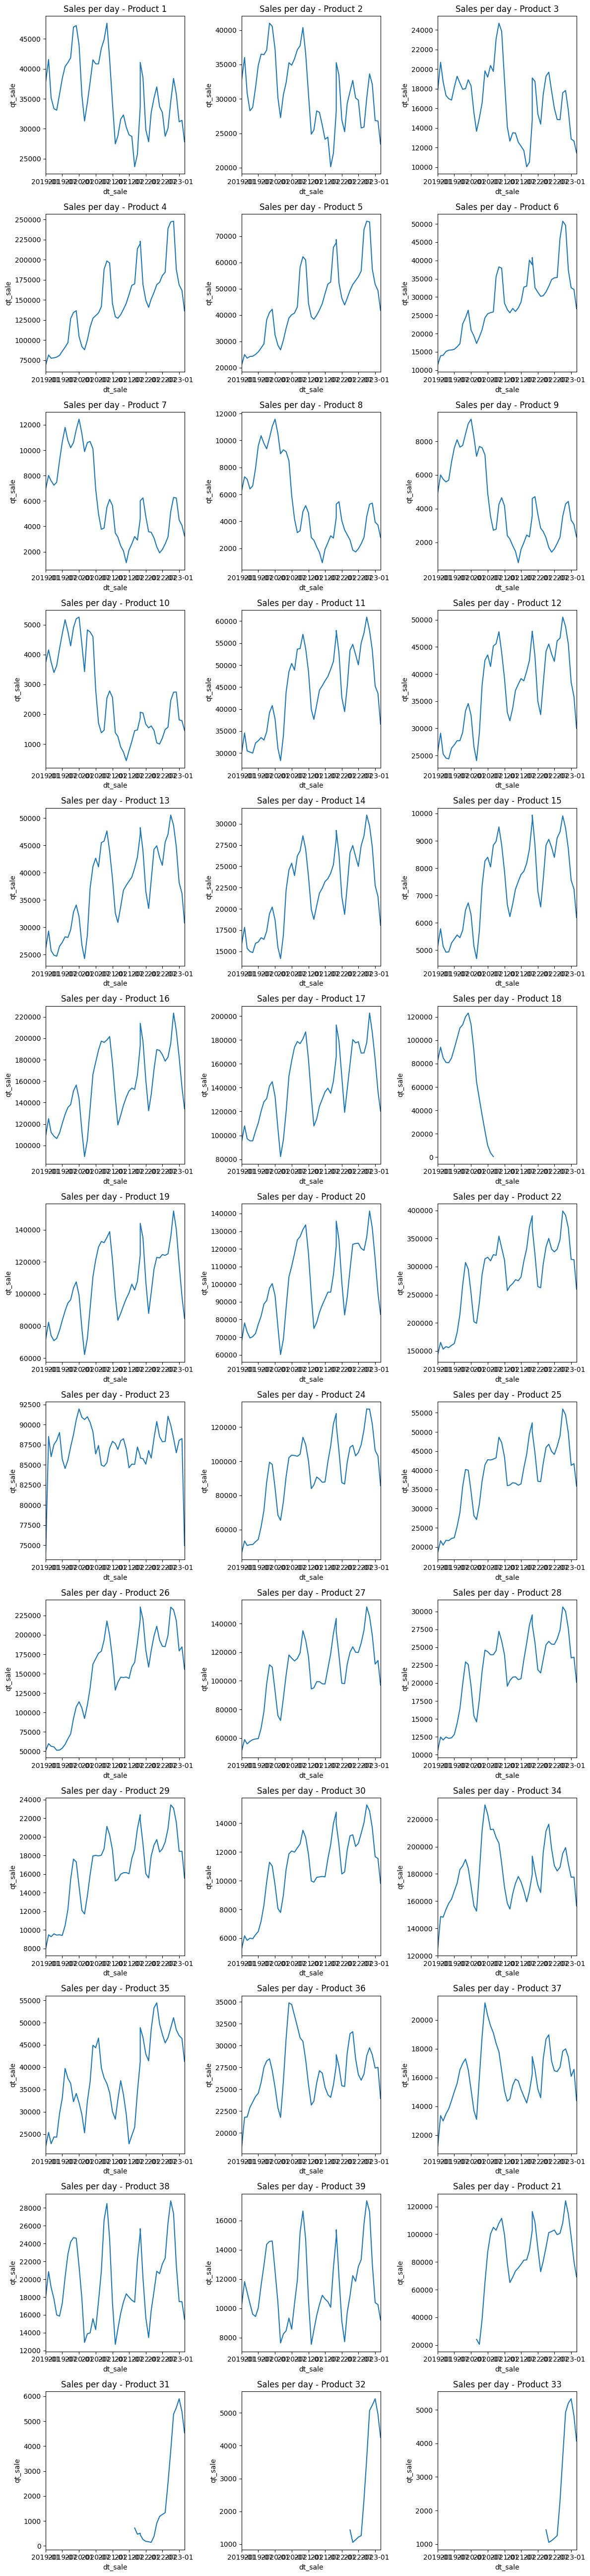

In [ ]:
# Calcular o número de linhas e colunas necessárias
colunas = 3
num_linhas = ((len(num_id_sku) + 2) // colunas) # Divisão arredondada para cima
num_colunas = min(len(num_id_sku), colunas)

# Criar a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, num_linhas * 4))

# Loop pelos produtos
for i, produto in enumerate(num_id_sku):
    # Calcular a posição do subplot
    linha = i // colunas
    coluna = i % colunas

    # Filtrar valores em coluna específica
    filtro = df_sale['id_sku'] == produto
    df_sale_filtrado = df_sale.loc[filtro]

    # Plotar o gráfico no subplot correspondente
    x = df_sale_filtrado['dt_sale']
    y = df_sale_filtrado['qt_sale']
    axs[linha, coluna].plot(x, y)
    axs[linha, coluna].set_xlabel('dt_sale')
    axs[linha, coluna].set_ylabel('qt_sale')
    axs[linha, coluna].set_title(f'Sales per day - Product {produto}')

    # Ajustar os limites do eixo x
    axs[linha, coluna].set_xlim(df_sale['dt_sale'].min(), df_sale['dt_sale'].max())

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir a figura
plt.show()

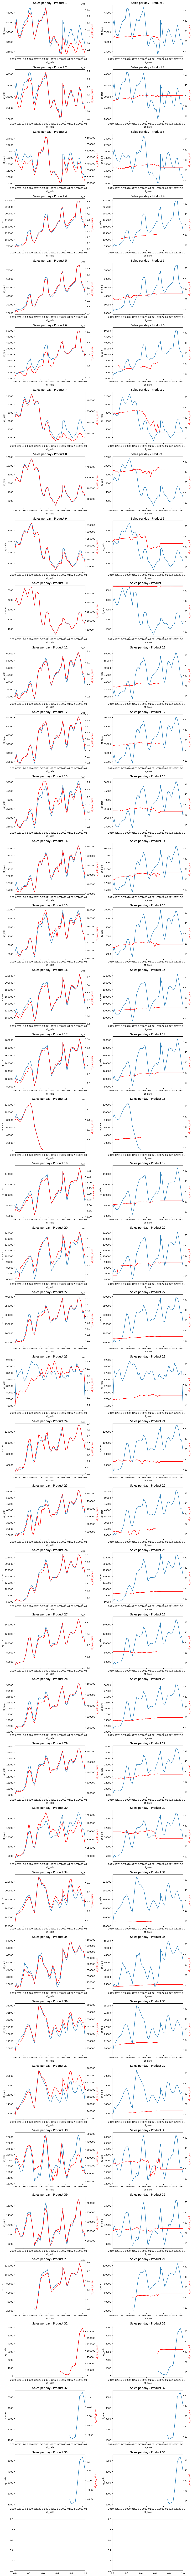

In [ ]:
# Calcular o número de linhas e colunas necessárias
colunas = 2
num_linhas = 2*((len(num_id_sku) + 2) // colunas) # Divisão arredondada para cima
num_colunas = min(len(num_id_sku), colunas)

# Criar a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, num_linhas * 4))

# Loop pelos produtos
for i, produto in enumerate(num_id_sku):
    # Calcular a posição do subplot
    linha = i
    for coluna in range(0, 2):
        # Filtrar valores em coluna específica
        filtro = df_sale['id_sku'] == produto
        df_sale_filtrado = df_sale.loc[filtro]

        # Plotar o gráfico no subplot correspondente
        x = df_sale_filtrado['dt_sale']
        y = df_sale_filtrado['qt_sale']
        axs[linha, coluna].plot(x, y)
        axs[linha, coluna].set_xlabel('dt_sale')
        axs[linha, coluna].set_ylabel('qt_sale')
        axs[linha, coluna].set_title(f'Sales per day - Product {produto}')

        if coluna == 0:
            # Eixo secundário para representar "vl_sale_price"
            y2 = df_sale_filtrado['vl_sale_price']
            ax2 = axs[linha, coluna].twinx()
            ax2.plot(x, y2, 'r-')
            ax2.set_ylabel('vl_sale_price', color='r')
            ax2.set_title(f'Sales per day - Product {produto}')
        else:
            # Eixo secundário para representar "vl_price_unit"
            y3 = df_sale_filtrado['vl_price_unit']
            ax3 = axs[linha, coluna].twinx()
            ax3.plot(x, y3, 'r-')
            ax3.set_ylabel('vl_price_unit', color='r')
            ax3.set_title(f'Sales per day - Product {produto}')
            ax3.set_ylim(5, 55)

        # Ajustar os limites do eixo x
        axs[linha, coluna].set_xlim(df_sale['dt_sale'].min(), df_sale['dt_sale'].max())

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir a figura
plt.show()

### 2.Feature Engineering


In [ ]:
# Fazer uma cópia do DataFrame original
df_vendas_feat_eng = df_vendas.copy()

In [ ]:
# Excluir a coluna 'coluna_indesejada'
del df_vendas_feat_eng['ds_sku']

# ds_sku: Descrição do SKU

In [ ]:
# seleciona colunas categoricas
object_cols = df_vendas_feat_eng.select_dtypes(include='object').columns.values
object_cols

array(['ds_category', 'ds_product_line', 'ds_brand_segment',
       'ds_tecnology'], dtype=object)

LEGENDA

*   ds_category: Categoria do SKU
*   ds_product_line: Linha de produtos do SKU
*   ds_brand_segment: Segmento da marca do SKU
*   ds_tecnology: Tecnologia do SKU





In [ ]:
# mostra valores distintos dessas colunas
for col in object_cols:
  print(col, df_vendas[col].unique())
  print("\n")

ds_category ['Aero Boot' 'Classic Sneaker' 'Designed Shoes' 'Infinity Boot'
 'Innovation Shoes' 'Metal Sandal' 'Metal Shoes' 'Price Sneakers'
 'Universe Sandals' 'NYCs Shoes']


ds_product_line ['Boot' 'Sneaker' 'Shoes' 'Sandals' 'Sneakers']


ds_brand_segment ['Target' 'Core']


ds_tecnology ['NanoMesh' 'LiteWeave' 'AeroKnit' 'PowerKnit' 'BioSole' 'DynaFit'
 'AirVent' 'UltraFoam' 'DuraFlex']




In [ ]:
# Cria variaveis dummies
df_vendas_dummies = pd.concat([df_vendas_feat_eng.drop(object_cols, axis=1),
                      pd.get_dummies(df_vendas_feat_eng[object_cols], prefix=object_cols)], axis=1)
print(df_vendas_dummies.shape)
df_vendas_dummies.head()

(1871, 32)


dt_sale_year  dt_sale_month  id_sku  qt_sale  vl_sale_price  vl_price_unit  \
0          2019              1       1    37873   8.763885e+05      23.140192   
1          2019              1       2    32881   8.328764e+05      25.330019   
2          2019              1       3    17849   3.989263e+05      22.350062   
3          2019              1       4    69531   1.104861e+06      15.890194   
4          2019              1       5    21138   4.426485e+05      20.940887   

   ds_category_Aero Boot  ds_category_Classic Sneaker  \
0                      1                            0   
1                      1                            0   
2                      1                            0   
3                      0                            1   
4                      0                            1   

   ds_category_Designed Shoes  ds_category_Infinity Boot  ...  \
0                           0                          0  ...   
1                           0                          0  ...   
2                           0                          0  ...   
3                           0                          0  ...   
4                           0                          0  ...   

   ds_brand_segment_Target  ds_tecnology_AeroKnit  ds_tecnology_AirVent  \
0                        1                      0                     0   
1                        1                      0                     0   
2                        1                      1                     0   
3                        1                      0                     0   
4                        1                      0                     0   

   ds_tecnology_BioSole  ds_tecnology_DuraFlex  ds_tecnology_DynaFit  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     0                      0                     0   
4                     0                      0                     0   

   ds_tecnology_LiteWeave  ds_tecnology_NanoMesh  ds_tecnology_PowerKnit  \
0                       0                      1                       0   
1                       1                      0                       0   
2                       0                      0                       0   
3                       0                      0                       1   
4                       0                      0                       1   

   ds_tecnology_UltraFoam  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 32 columns]